In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
df = pd.read_csv('nyc-rolling-sales.csv')
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 0:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 0:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 0:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 0:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 0:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,NaN,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 0:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,NaN,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 0:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,NaN,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 0:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,NaN,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 0:00:00


In [10]:
import pandas as pd

# Membaca dataset dari file CSV
data = pd.read_csv('nyc-rolling-sales.csv')  # Gantilah 'nama_file.csv' dengan nama file Anda

# Membersihkan data dengan menghapus baris yang tidak dapat diubah menjadi float
data = data[data['SALE PRICE'].apply(lambda x: x.replace('-', '').isdigit())]

# Mengkonversi kolom 'SALE PRICE' ke tipe data numerik
data['SALE PRICE'] = data['SALE PRICE'].str.replace('-', '').astype(float)

# Sekarang, Anda dapat menghitung mean, median, dan mode seperti sebelumnya
mean = data['SALE PRICE'].mean()
median = data['SALE PRICE'].median()
mode = data['SALE PRICE'].mode().iloc[0]
range_value = data['SALE PRICE'].max() - data['SALE PRICE'].min()
variance = ((data['SALE PRICE'] - mean) ** 2).mean()
std_deviation = data['SALE PRICE'].std()

print("Range (Jangkauan):", range_value)
print("Mean (Rata-rata):", mean)
print("Median (Nilai Tengah):", median)
print("Mode (Nilai Mode):", mode)
print("Variance (Variansi):", variance)
print("Standar Deviasi:", std_deviation)

Range (Jangkauan): 2210000000.0
Mean (Rata-rata): 1276456.4977638705
Median (Nilai Tengah): 530000.0
Mode (Nilai Mode): 0.0
Variance (Variansi): 130077990878434.4
Standar Deviasi: 11405255.345990326


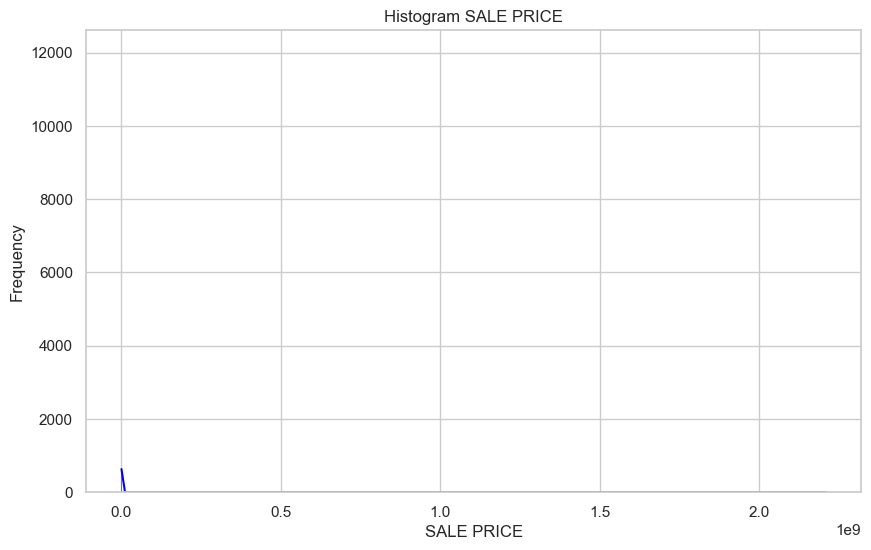

Data tidak berdistribusi normal (distribusi probabilitas berbeda)


In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data['SALE PRICE'], kde=True, color='blue')
plt.title('Histogram SALE PRICE')
plt.xlabel('SALE PRICE')
plt.ylabel('Frequency')
plt.show()

from scipy import stats
k2, p = stats.kstest(data['SALE PRICE'], 'norm')

if p < 0.05:
    print("Data tidak berdistribusi normal (distribusi probabilitas berbeda)")
else:
    print("Data berdistribusi normal (distribusi probabilitas sama)")

In [18]:
sample_mean = data['SALE PRICE'].mean()
sample_std = data['SALE PRICE'].std()
sample_size = len(data)
confidence_level = 0.95
margin_error = sample_std / np.sqrt(sample_size)
z_score = stats.norm.ppf((1 + confidence_level) / 2)
confidence_interval = (sample_mean - z_score * margin_error, sample_mean + z_score * margin_error)
print("Interval confidence:", confidence_interval)


Interval confidence: (1191958.8897437064, 1360954.1057840346)


In [21]:
group_A = data[data['BOROUGH'] == 'A']['SALE PRICE']
group_B = data[data['BOROUGH'] == 'B']['NEIGHBORHOOD']
t_stat, p_value = stats.ttest_ind(group_A, group_B)
if p_value < 0.05:
    print("Terdapat Perbedaan yang signifikan")
else:
    print("Tidak ada perbedaan yang signifikan")

Tidak ada perbedaan yang signifikan


In [24]:
contingency_table = pd.crosstab(data['BOROUGH'], data['TAX CLASS AT PRESENT'])
chi2, p, _, _ = chi2_contingency(contingency_table)

if p < 0.05:
    print("Dapat disimpulkan bahwa ada keterkaitan yang signifikan antara variabel.")
else:
    print("Dapat disimpulkan bahwa tidak ada keterkaitan yang signifikan antara variabel.")

Dapat disimpulkan bahwa ada keterkaitan yang signifikan antara variabel.
